In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import os
os.chdir('/Users/qianwang/Desktop/TradingChallenge')

In [2]:
multipliers = np.array([[24, 70, 41, 21, 60],
                       [47, 82, 87, 80, 35],
                       [73, 89, 100, 90, 17],
                       [77, 83, 85, 79, 55],
                       [12, 27, 52, 15, 30]])
treasures = multipliers * 7.5 # 7.5k base treasure

hunters = np.array([[2, 4, 3, 2, 4],
                    [3, 5, 5, 5, 3],
                    [4, 5, 8, 7, 2],
                    [5, 5, 5, 5, 4],
                    [2, 3, 4, 2, 3]])

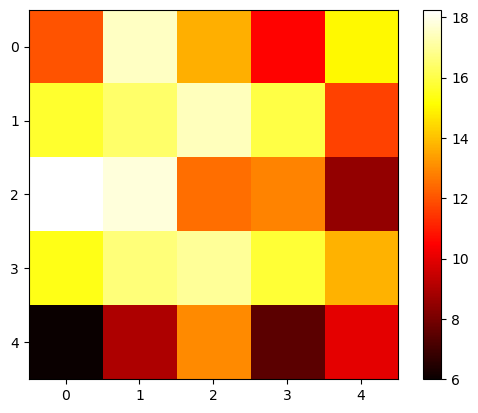

In [3]:
plt.imshow(multipliers/hunters, cmap='hot')
plt.colorbar()
plt.show()

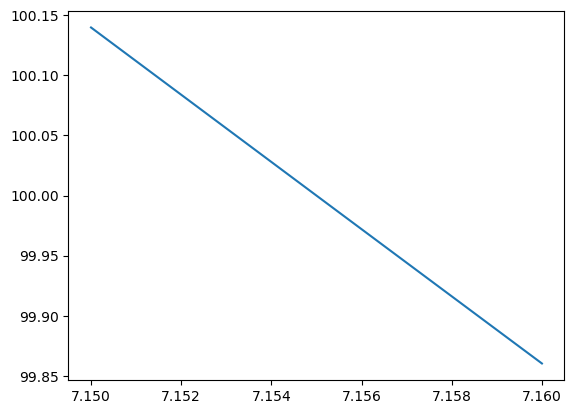

In [4]:
y_list = np.linspace(7.15, 7.16, 1000)
p_list = np.empty(len(y_list))
for i, y in enumerate(y_list):
    p_list[i] = np.sum(multipliers/y -hunters)

plt.plot(y_list, p_list)
plt.show()

In [5]:
profit = y_list[p_list<100][0]
profit

7.155005005005005

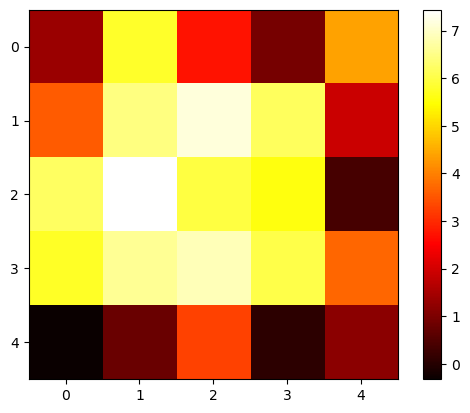

array([[ 1.35429535,  5.78336143,  2.73025455,  0.93500843,  4.38573837],
       [ 3.56882839,  6.4605091 ,  7.15932063,  6.18098449,  1.89168072],
       [ 6.20264835,  7.43884525,  5.97623061,  5.57860755,  0.3759592 ],
       [ 5.76169757,  6.60027141,  6.87979602,  6.04122219,  3.68692684],
       [-0.32285233,  0.77358227,  3.26763992,  0.09643459,  1.19286918]])

In [6]:
percentages = multipliers/profit - hunters
plt.imshow(percentages, cmap='hot')
plt.colorbar()
plt.show()
percentages

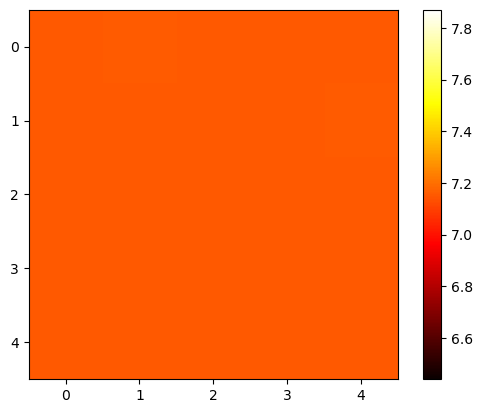

In [7]:
plt.imshow(multipliers/(hunters+percentages), cmap='hot')
plt.colorbar()
plt.show()

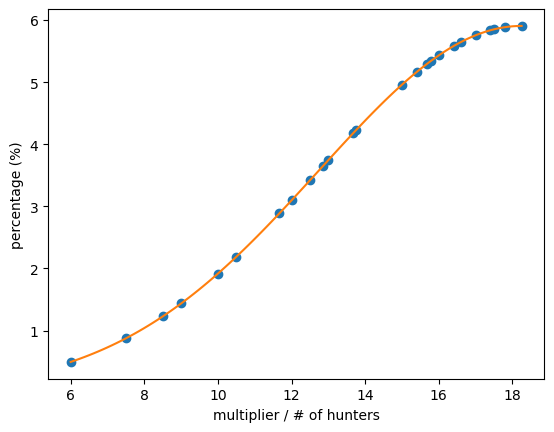

In [8]:
ratios = multipliers/hunters
r_list = np.linspace(ratios.min(), ratios.max(), 100)
sigma = 5.5
gaussian = lambda x: np.exp(-0.5 * (x-ratios.max())**2 / sigma**2)
amp = 100 / gaussian(ratios).sum()
percentages = amp * gaussian(ratios)
plt.plot(ratios.flatten(), percentages.flatten(), 'o')
plt.plot(r_list, amp * gaussian(r_list))
plt.xlabel('multiplier / # of hunters')
plt.ylabel('percentage (%)')
plt.show()

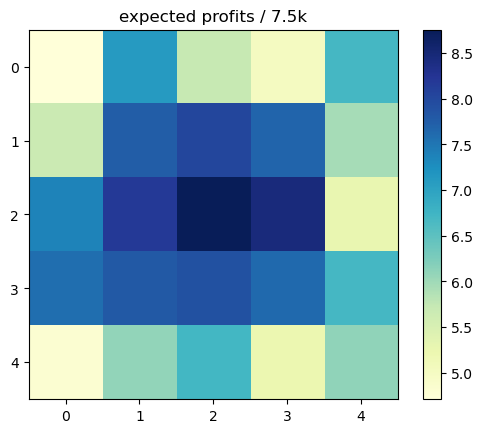

array([[4.70874382, 7.10523223, 5.71519534, 5.01352361, 6.69616724],
       [5.66970869, 7.74922998, 8.02846758, 7.66840043, 5.94682838],
       [7.36885713, 8.17502284, 8.75673824, 8.44888919, 5.26763045],
       [7.57539059, 7.79587711, 7.90259231, 7.63383038, 6.68578622],
       [4.81067936, 6.08667215, 6.71380488, 5.2182321 , 6.10056394]])

In [9]:
plt.imshow(multipliers/(hunters+percentages), cmap='YlGnBu')
plt.colorbar()
plt.title("expected profits / 7.5k")
plt.show()
multipliers/(hunters+percentages)

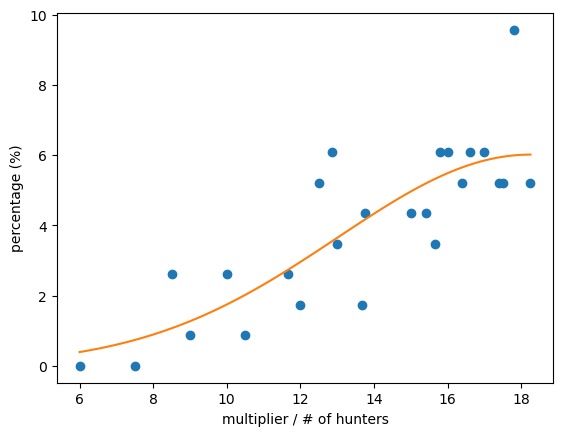

sigma = 5.25, amp = 6.019


In [12]:
df = pd.read_csv('codes/round_3/manual_trading/round 3 manual - Sheet1.csv', skiprows=2)
ratios = df['Cell'].dropna().values / df['Hunters'].dropna().values
percentages_poll = df['Expedition %'].dropna().values
percentages_poll = np.array([float(i[:-1]) for i in percentages_poll])
percentages_poll


gaussian = lambda x, sigma, amp: amp * np.exp(-0.5 * (x-ratios.max())**2 / sigma**2)
popt, pcov = curve_fit(gaussian, ratios, percentages_poll, p0=[5, 0.5])

r_list = np.linspace(ratios.min(), ratios.max(), 100)

plt.plot(ratios, percentages_poll, 'o')
plt.plot(r_list, gaussian(r_list, *popt))
plt.xlabel('multiplier / # of hunters')
plt.ylabel('percentage (%)')
plt.show()
print(f"sigma = {popt[0]:.2f}, amp = {popt[1]:.3f}")

In [ ]:
ratios.max()

18.25